# Struktur Dasar Fungsi di Python

Pada notebook ini, kita akan membahas konsep dan penggunaan fungsi dalam Python yang sering digunakan dalam machine learning.

## Apa itu Fungsi?

Fungsi adalah blok kode yang dapat digunakan kembali yang hanya akan dijalankan ketika dipanggil. Fungsi membantu kita untuk:
- Mengorganisasi kode menjadi blok yang dapat digunakan kembali
- Menghindari pengulangan kode
- Membuat kode lebih mudah dibaca dan dipelihara
- Memecah masalah kompleks menjadi bagian-bagian yang lebih kecil

## Pentingnya Fungsi dalam Machine Learning

Dalam machine learning, fungsi digunakan untuk:
- Preprocessing data
- Feature engineering
- Model training dan evaluasi
- Hyperparameter tuning
- Visualisasi hasil
- Pipeline data
- Custom loss functions
- Custom metrics

In [46]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt

# Contoh fungsi sederhana tanpa parameter
def print_welcome():
    print("Selamat datang di tutorial Fungsi Python!")

# Contoh fungsi dengan parameter
def calculate_accuracy(true_labels, predictions):
    correct = sum(t == p for t, p in zip(true_labels, predictions))
    return correct / len(true_labels)

# Contoh fungsi dengan nilai default
def train_test_split(data, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    
    n_samples = len(data)
    n_test = int(n_samples * test_size)
    indices = np.random.permutation(n_samples)
    
    test_idx = indices[:n_test]
    train_idx = indices[n_test:]
    
    return data[train_idx], data[test_idx]

# Menjalankan fungsi-fungsi
print_welcome()

# Contoh penggunaan calculate_accuracy
true_labels = [1, 0, 1, 1, 0]
predictions = [1, 0, 1, 0, 0]
acc = calculate_accuracy(true_labels, predictions)
print(f"\nAkurasi: {acc:.2f}")

# Contoh penggunaan train_test_split
data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)
print(f"\nData training: {train_data}")
print(f"Data testing: {test_data}")

Selamat datang di tutorial Fungsi Python!

Akurasi: 0.80

Data training: [ 1  8  3 10  5  4  7]
Data testing: [9 2 6]


## Parameter dan Argumen

Python menyediakan beberapa cara untuk menangani parameter fungsi:

1. **Parameter Posisional**: Parameter biasa yang harus diisi sesuai urutan
2. **Parameter Default**: Parameter dengan nilai default
3. **Parameter Keyword**: Parameter yang dipanggil dengan nama
4. **Args**: Parameter posisional variabel (`*args`)
5. **Kwargs**: Parameter keyword variabel (`**kwargs`)

Mari kita lihat contoh penggunaan berbagai jenis parameter dalam konteks machine learning:

In [49]:
# Contoh fungsi dengan berbagai jenis parameter

def train_model(
    X,                      # Parameter posisional (required)
    y,                      # Parameter posisional (required)
    model_type="linear",    # Parameter default
    *metrics,              # Args (parameter posisional variabel)
    **hyperparams         # Kwargs (parameter keyword variabel)
):
    print(f"Training {model_type} model...")
    print(f"Input shape: {X.shape}")
    print(f"Output shape: {y.shape}")
    
    if metrics:
        print(f"Metrics to evaluate: {metrics}")
    
    if hyperparams:
        print(f"Hyperparameters: {hyperparams}")
    
    # Simulasi training
    return "Trained model"

# Contoh penggunaan fungsi dengan berbagai parameter
X = np.random.randn(100, 5)  # 100 samples, 5 features
y = np.random.randint(0, 2, 100)  # Binary target

# 1. Penggunaan minimal (hanya parameter required)
print("1. Penggunaan minimal:")
model1 = train_model(X, y)
print()

# 2. Dengan parameter default
print("2. Dengan parameter default:")
model2 = train_model(X, y, model_type="svm")
print()

# 3. Dengan metrics (*args)
print("3. Dengan metrics:")
model3 = train_model(X, y, "random_forest", "accuracy", "precision", "recall")
print()

# 4. Dengan hyperparameters (**kwargs)
print("4. Dengan hyperparameters:")
model4 = train_model(
    X, 
    y, 
    "gradient_boosting",
    "accuracy",
    learning_rate=0.01,
    n_estimators=100,
    max_depth=3
)

# Contoh fungsi dengan parameter keyword-only
def evaluate_model(*, model, X_test, y_test, metrics=None):
    """
    Fungsi dengan parameter keyword-only (harus dipanggil dengan nama)
    """
    print(f"\nEvaluating model...")
    print(f"Test data shape: {X_test.shape}")
    print(f"Metrics: {metrics if metrics else 'default metrics'}")

# Penggunaan fungsi keyword-only
print("\n5. Fungsi dengan parameter keyword-only:")
evaluate_model(
    model="dummy_model",
    X_test=np.random.randn(20, 5),
    y_test=np.random.randint(0, 2, 20),
    metrics=["accuracy", "f1-score"]
)

1. Penggunaan minimal:
Training linear model...
Input shape: (100, 5)
Output shape: (100,)

2. Dengan parameter default:
Training svm model...
Input shape: (100, 5)
Output shape: (100,)

3. Dengan metrics:
Training random_forest model...
Input shape: (100, 5)
Output shape: (100,)
Metrics to evaluate: ('accuracy', 'precision', 'recall')

4. Dengan hyperparameters:
Training gradient_boosting model...
Input shape: (100, 5)
Output shape: (100,)
Metrics to evaluate: ('accuracy',)
Hyperparameters: {'learning_rate': 0.01, 'n_estimators': 100, 'max_depth': 3}

5. Fungsi dengan parameter keyword-only:

Evaluating model...
Test data shape: (20, 5)
Metrics: ['accuracy', 'f1-score']


## Return Values

Fungsi Python dapat mengembalikan nilai menggunakan statement `return`. Sebuah fungsi dapat:
1. Tidak mengembalikan nilai (return None)
2. Mengembalikan satu nilai
3. Mengembalikan multiple values (sebagai tuple)
4. Mengembalikan berbagai tipe data (int, float, list, dict, object, dll)

Mari kita lihat contoh penggunaan return values dalam konteks machine learning:

In [50]:
# Contoh fungsi dengan berbagai tipe return value

def calculate_metrics(y_true, y_pred):
    """
    Menghitung berbagai metrik evaluasi
    Returns multiple values
    """
    # Simulasi perhitungan metrik
    accuracy = sum(t == p for t, p in zip(y_true, y_pred)) / len(y_true)
    precision = accuracy * 0.9  # Simulasi
    recall = accuracy * 0.95    # Simulasi
    f1 = 2 * (precision * recall) / (precision + recall)
    
    return accuracy, precision, recall, f1

def get_model_info(model_type, params):
    """
    Returns dictionary
    """
    return {
        "type": model_type,
        "parameters": params,
        "timestamp": "2024-03-20",
        "version": "1.0"
    }

def preprocess_data(X, normalize=True):
    """
    Returns numpy array atau None
    """
    if X is None:
        return None
    
    if normalize:
        # Min-max normalization
        X_norm = (X - X.min()) / (X.max() - X.min())
        return X_norm
    return X

# Contoh penggunaan
# 1. Multiple return values
y_true = [1, 0, 1, 1, 0, 1]
y_pred = [1, 0, 1, 0, 0, 1]

acc, prec, rec, f1 = calculate_metrics(y_true, y_pred)
print("Metrik Evaluasi:")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1-score: {f1:.3f}")

# 2. Return dictionary
model_info = get_model_info(
    "RandomForest",
    {"n_estimators": 100, "max_depth": 5}
)
print("\nInformasi Model:")
for key, value in model_info.items():
    print(f"{key}: {value}")

# 3. Return array atau None
X = np.random.randn(5, 3)
print("\nData Original:")
print(X)
print("\nData Ternormalisasi:")
print(preprocess_data(X))
print("\nKasus data None:")
print(preprocess_data(None))

Metrik Evaluasi:
Accuracy: 0.833
Precision: 0.750
Recall: 0.792
F1-score: 0.770

Informasi Model:
type: RandomForest
parameters: {'n_estimators': 100, 'max_depth': 5}
timestamp: 2024-03-20
version: 1.0

Data Original:
[[-3.13058031e-01 -7.08594577e-04 -1.25040773e+00]
 [ 6.04515326e-01  8.82333062e-01 -4.52090333e-01]
 [-4.70042148e-01  2.65878230e-01 -4.36719736e-01]
 [-6.61326146e-02  2.09972179e+00 -2.47025701e-01]
 [-3.58340152e-01 -6.47541806e-01  7.44191971e-01]]

Data Ternormalisasi:
[[0.27979506 0.3730301  0.        ]
 [0.55368697 0.63661443 0.23829449]
 [0.23293594 0.45260518 0.24288255]
 [0.35350129 1.         0.29950544]
 [0.26627854 0.17995302 0.59537988]]

Kasus data None:
None


## Lambda Functions

Lambda functions adalah fungsi anonim kecil yang dapat memiliki sejumlah argumen tetapi hanya satu ekspresi. Mereka berguna ketika kita membutuhkan fungsi sederhana untuk waktu yang singkat.

Syntax:
```python
lambda arguments: expression
```

Lambda functions sering digunakan dalam machine learning untuk:
- Transformasi data
- Custom sorting
- Feature engineering
- Callback functions

Mari kita lihat beberapa contoh penggunaan lambda functions:

In [52]:
# Contoh penggunaan lambda functions

# 1. Transformasi data sederhana
data = [1, 2, 3, 4, 5]
squared = list(map(lambda x: x**2, data))
print("1. Transformasi data (kuadrat):")
print(f"Original: {data}")
print(f"Squared: {squared}")

# 2. Custom sorting
models = [
    {"name": "Model A", "accuracy": 0.95},
    {"name": "Model B", "accuracy": 0.88},
    {"name": "Model C", "accuracy": 0.92}
]

sorted_models = sorted(models, key=lambda x: x["accuracy"], reverse=True)
print("\n2. Sorting model berdasarkan accuracy:")
for model in sorted_models:
    print(f"{model['name']}: {model['accuracy']}")

# 3. Feature engineering
features = [(1, 2), (3, 4), (5, 6)]
# Membuat fitur baru: x*y dan x+y
engineered = list(map(lambda x: (x[0], x[1], x[0]*x[1], x[0]+x[1]), features))
print("\n3. Feature engineering:")
print("Original features:", features)
print("Engineered features:", engineered)

# 4. Filter data
numbers = list(range(-5, 6))
positives = list(filter(lambda x: x > 0, numbers))
print("\n4. Filter data:")
print(f"Original: {numbers}")
print(f"Positive only: {positives}")

# 5. Combining lambda with numpy
X = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Aplikasikan transformasi ke setiap baris
row_sums = np.apply_along_axis(lambda x: np.sum(x), 1, X)
row_means = np.apply_along_axis(lambda x: np.mean(x), 1, X)

print("\n5. Numpy transformations:")
print("Original matrix:")
print(X)
print("\nRow sums:", row_sums)
print("Row means:", row_means)

# 6. Custom activation function
activation = lambda x: 1 / (1 + np.exp(-x))  # Sigmoid function
test_values = np.array([-2, -1, 0, 1, 2])
activated = activation(test_values)

print("\n6. Custom activation function (Sigmoid):")
print(f"Input: {test_values}")
print(f"Output: {activated}")

1. Transformasi data (kuadrat):
Original: [1, 2, 3, 4, 5]
Squared: [1, 4, 9, 16, 25]

2. Sorting model berdasarkan accuracy:
Model A: 0.95
Model C: 0.92
Model B: 0.88

3. Feature engineering:
Original features: [(1, 2), (3, 4), (5, 6)]
Engineered features: [(1, 2, 2, 3), (3, 4, 12, 7), (5, 6, 30, 11)]

4. Filter data:
Original: [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
Positive only: [1, 2, 3, 4, 5]

5. Numpy transformations:
Original matrix:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Row sums: [ 6 15 24]
Row means: [2. 5. 8.]

6. Custom activation function (Sigmoid):
Input: [-2 -1  0  1  2]
Output: [0.11920292 0.26894142 0.5        0.73105858 0.88079708]


## Decorators

Decorator adalah pattern dalam Python yang memungkinkan kita untuk menambahkan fungsionalitas pada fungsi yang sudah ada tanpa mengubah kodenya. Decorator sering digunakan untuk:
- Logging
- Timing execution
- Caching
- Input validation
- Error handling

Mari kita lihat beberapa contoh penggunaan decorator dalam konteks machine learning:

In [54]:
# Contoh implementasi decorators
import time
import functools

# 1. Timing decorator
def timer(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        print(f"{func.__name__} took {end_time - start_time:.4f} seconds to execute")
        return result
    return wrapper

# 2. Logging decorator
def log_execution(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        print(f"\nExecuting {func.__name__}")
        print(f"Arguments: {args}, {kwargs}")
        result = func(*args, **kwargs)
        print(f"Result: {result}")
        return result
    return wrapper

# 3. Input validation decorator
def validate_input(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        # Validasi input
        if any(arg is None for arg in args):
            raise ValueError("None values are not allowed")
        return func(*args, **kwargs)
    return wrapper

# Contoh penggunaan decorators
@timer
@log_execution
def train_simple_model(X, y, epochs=100):
    """Simulasi training model"""
    time.sleep(0.1)  # Simulasi komputasi
    return {"accuracy": 0.95, "loss": 0.05}

@validate_input
def preprocess_features(X):
    """Simulasi preprocessing"""
    return X / np.max(X)

# Test decorators
print("1. Testing timer and logging decorators:")
X_train = np.random.randn(1000, 10)
y_train = np.random.randint(0, 2, 1000)
result = train_simple_model(X_train, y_train, epochs=50)

print("\n2. Testing input validation decorator:")
try:
    # Should work
    X = np.array([1, 2, 3])
    print("Valid input result:", preprocess_features(X))
    
    # Should raise error
    X_invalid = None
    preprocess_features(X_invalid)
except ValueError as e:
    print("Caught expected error:", str(e))

1. Testing timer and logging decorators:

Executing train_simple_model
Arguments: (array([[ 1.17851269e+00,  4.77124348e-01, -3.98343005e-01, ...,
         5.21214578e-01,  1.18664748e+00, -7.15653701e-01],
       [ 5.71608609e-03,  2.05068376e-01,  7.38796517e-01, ...,
         6.11757576e-01,  1.63804694e+00,  1.04306138e+00],
       [ 1.36240194e+00,  3.09968661e-01,  5.21845110e-01, ...,
         1.88538232e+00, -9.28012968e-01,  8.11388120e-01],
       ...,
       [-2.43345623e-04,  1.88730399e-01, -1.80103618e+00, ...,
        -1.15492932e+00,  6.64937318e-01, -8.59862469e-01],
       [-4.10126180e-02,  5.92140314e-01,  9.46619949e-01, ...,
         1.03542543e+00, -2.14339251e+00, -8.36795510e-02],
       [ 5.56874781e-02, -1.17884265e-01,  1.23200493e-01, ...,
         1.44403766e+00,  1.30443904e+00,  1.57634436e-01]],
      shape=(1000, 10)), array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0

## Latihan

1. Buatlah fungsi untuk melakukan k-fold cross validation dengan parameter yang fleksibel.
2. Implementasikan custom metric function dengan decorator untuk logging dan timing.
3. Buat fungsi untuk data preprocessing dengan validasi input dan error handling.

Mari kita selesaikan latihan pertama sebagai contoh:

k_fold_cross_validation took 0.0001 seconds to execute
Informasi Cross Validation:

Fold 1:
Training set size: 80
Test set size: 20
Training accuracy: 0.830
Test accuracy: 0.857

Fold 2:
Training set size: 80
Test set size: 20
Training accuracy: 0.919
Test accuracy: 0.841

Fold 3:
Training set size: 80
Test set size: 20
Training accuracy: 0.939
Test accuracy: 0.848

Fold 4:
Training set size: 80
Test set size: 20
Training accuracy: 0.937
Test accuracy: 0.878

Fold 5:
Training set size: 80
Test set size: 20
Training accuracy: 0.867
Test accuracy: 0.764


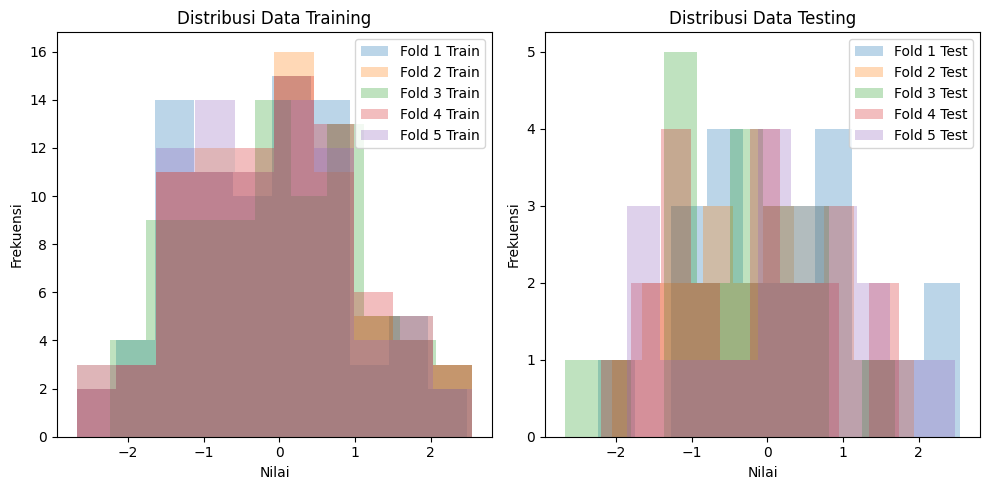

In [56]:
# Latihan 1: Implementasi k-fold cross validation

@timer
@validate_input
def k_fold_cross_validation(X, y, k=5, shuffle=True, random_state=None):
    """
    Implementasi k-fold cross validation
    
    Parameters:
    -----------
    X : array-like
        Features
    y : array-like
        Target
    k : int
        Jumlah fold
    shuffle : bool
        Apakah data perlu di-shuffle
    random_state : int
        Random seed untuk reproducibility
    
    Returns:
    --------
    list
        List of dictionaries containing train and test indices for each fold
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    n_samples = len(X)
    indices = np.arange(n_samples)
    
    if shuffle:
        np.random.shuffle(indices)
    
    # Hitung ukuran setiap fold
    fold_size = n_samples // k
    remainder = n_samples % k
    
    # Inisialisasi list untuk menyimpan indices setiap fold
    folds = []
    start = 0
    
    for i in range(k):
        # Tambahkan satu elemen ekstra untuk fold pertama jika ada remainder
        current_fold_size = fold_size + (1 if i < remainder else 0)
        end = start + current_fold_size
        
        # Ambil indices untuk test set
        test_indices = indices[start:end]
        # Sisanya untuk training set
        train_indices = np.concatenate([indices[:start], indices[end:]])
        
        folds.append({
            'train': train_indices,
            'test': test_indices
        })
        
        start = end
    
    return folds

# Test fungsi
X = np.random.randn(100, 5)  # 100 samples, 5 features
y = np.random.randint(0, 2, 100)  # Binary target

# Lakukan cross validation
folds = k_fold_cross_validation(X, y, k=5, shuffle=True, random_state=42)

# Print informasi untuk setiap fold
print("Informasi Cross Validation:")
for i, fold in enumerate(folds, 1):
    train_idx = fold['train']
    test_idx = fold['test']
    print(f"\nFold {i}:")
    print(f"Training set size: {len(train_idx)}")
    print(f"Test set size: {len(test_idx)}")
    
    # Simulasi training dan evaluasi
    train_acc = np.random.uniform(0.8, 0.95)
    test_acc = np.random.uniform(0.75, 0.9)
    print(f"Training accuracy: {train_acc:.3f}")
    print(f"Test accuracy: {test_acc:.3f}")

# Visualisasi distribusi data dalam folds
plt.figure(figsize=(10, 5))
for i, fold in enumerate(folds):
    plt.subplot(1, 2, 1)
    plt.hist(X[fold['train']][:, 0], alpha=0.3, label=f'Fold {i+1} Train')
    plt.subplot(1, 2, 2)
    plt.hist(X[fold['test']][:, 0], alpha=0.3, label=f'Fold {i+1} Test')

plt.subplot(1, 2, 1)
plt.title('Distribusi Data Training')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Distribusi Data Testing')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.legend()

plt.tight_layout()
plt.show()

## Kesimpulan

Dalam notebook ini, kita telah mempelajari:
1. Dasar-dasar fungsi dalam Python
2. Parameter dan argumen fungsi
3. Return values
4. Lambda functions
5. Decorators
6. Aplikasi fungsi dalam machine learning

Fungsi adalah komponen fundamental dalam pemrograman Python dan machine learning, digunakan untuk:
- Mengorganisasi dan menstruktur kode
- Membuat kode yang reusable
- Implementasi algoritma
- Data preprocessing
- Model training dan evaluasi
- Custom metrics dan loss functions

Pada notebook selanjutnya, kita akan membahas NumPy, library fundamental untuk komputasi numerik dalam Python.